In [1]:
!pip install stellargraph[demos]

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)


  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.0
    Uninstalling numpy-1.18.0:
      Successfully uninstalled numpy-1.18.0
  Rolling back uninstall of numpy
  Moving to /home/jovyan/.local/bin/f2py
   from /tmp/pip-uninstall-wp_3zx3u/f2py
  Moving to /home/jovyan/.local/bin/f2py3
   from /tmp/pip-uninstall-wp_3zx3u/f2py3
  Moving to /home/jovyan/.local/bin/f2py3.7
   from /tmp/pip-uninstall-wp_3zx3u/f2py3.7
  Moving to /home/jovyan/.local/lib/python3.7/site-packages/numpy-1.18.0.dist-info/
   from /home/jovyan/.local/lib/python3.7/site-packages/~umpy-1.18.0.dist-info
  Moving to /home/jovyan/.local/lib/python3.7/site-packages/numpy/
   from /home/jovyan/.local/lib/python3.7/site-packages/~-mpy
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/home/user/conda/lib/python3.7/site-packages/numpy/_distributor_init.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the '/home/user/

In [3]:
!pip install networkx

You should consider upgrading via the '/home/user/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import random
from tqdm import tqdm

pd.set_option('display.max_columns', 500)
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split
import networkx as nx
from stellargraph.mapper import GraphWaveGenerator
from stellargraph import StellarGraph
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse.linalg import eigs
import tensorflow as tf
from tensorflow.keras import backend as K


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

from stellargraph import datasets
from IPython.display import display, HTML

## DATASET PROCESING

Загружаем граф:

In [6]:
graph = pd.read_csv("graph_abakan_F_encoded.csv",index_col = 0)

Генерируем edge list:

In [7]:
def get_index_tuples(df):
    lst = []
    for i in tqdm(range(len(df))):
        tmp = df['adjacent'][i].split(',')
        for edge in tmp:
            lst.append([i, int(edge)])
            
    return lst
lst = get_index_tuples(graph)
lst = pd.DataFrame(lst)

100%|██████████| 65524/65524 [00:04<00:00, 14872.22it/s]


In [8]:
edge_data = pd.DataFrame(
    {
        "source": list(lst[0]),
        "target": list(lst[1])
    }
)

In [9]:
node_data = graph.drop(["edge_id", "adjacent", "style_<pandas.io.formats.style.Styler object at 0x000001B5DF375370>"], axis = 1)

In [10]:
G = sg.StellarGraph(
    {"street": node_data}, {"connection": edge_data}
)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 65524, Edges: 340012

 Node types:
  street: [65524]
    Features: float32 vector, length 73
    Edge types: street-connection->street

 Edge types:
    street-connection->street: [340012]
        Weights: all 1 (default)
        Features: none


In [11]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
    RelationalFullBatchNodeGenerator
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE, RGCN

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

In [24]:
rgcn_generator = RelationalFullBatchNodeGenerator(G)
rgcn = RGCN(
        layer_sizes=[64, 30],
        activations=["elu","softmax"],
        generator=rgcn_generator,
        dropout=0.5
    )
corrupted_generator = CorruptedGenerator(rgcn_generator)
gen = corrupted_generator.flow(G.nodes())

infomax = DeepGraphInfomax(rgcn, corrupted_generator)
x_in, x_out = infomax.in_out_tensors()

model = Model(inputs=x_in, outputs=x_out)
model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))

In [25]:
es = EarlyStopping(monitor="loss", min_delta=0, patience=20)
history = model.fit(gen, epochs=10000, verbose=1)

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 0.7178
Epoch 2/10000
1/1 [==============================] - 0s 256ms/step - loss: 0.7135
Epoch 3/10000
1/1 [==============================] - 0s 252ms/step - loss: 0.7107
Epoch 4/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.7063
Epoch 5/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.7020
Epoch 6/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.7006
Epoch 7/10000
1/1 [==============================] - 0s 259ms/step - loss: 0.6983
Epoch 8/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.6961
Epoch 9/10000
1/1 [==============================] - 0s 251ms/step - loss: 0.6949
Epoch 10/10000
1/1 [==============================] - 0s 242ms/step - loss: 0.6936
Epoch 11/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.6928
Epoch 12/10000
1/1 [==============================] - 0s 216ms/step - loss: 0.6917
Epoch 13/10000
1

1/1 [==============================] - 0s 224ms/step - loss: 0.5560
Epoch 197/10000
1/1 [==============================] - 0s 258ms/step - loss: 0.5507
Epoch 198/10000
1/1 [==============================] - 0s 251ms/step - loss: 0.5509
Epoch 199/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.5560
Epoch 200/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.5493
Epoch 201/10000
1/1 [==============================] - 0s 251ms/step - loss: 0.5472
Epoch 202/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.5484
Epoch 203/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.5453
Epoch 204/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.5459
Epoch 205/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.5422
Epoch 206/10000
1/1 [==============================] - 0s 277ms/step - loss: 0.5413
Epoch 207/10000
1/1 [==============================] - 0s 274ms/step - loss: 0.5397
Epoch 20

1/1 [==============================] - 0s 234ms/step - loss: 0.2940
Epoch 391/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.2904
Epoch 392/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.2999
Epoch 393/10000
1/1 [==============================] - 0s 266ms/step - loss: 0.2905
Epoch 394/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.2965
Epoch 395/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.2948
Epoch 396/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.2950
Epoch 397/10000
1/1 [==============================] - 0s 266ms/step - loss: 0.2886
Epoch 398/10000
1/1 [==============================] - 0s 220ms/step - loss: 0.2904
Epoch 399/10000
1/1 [==============================] - 0s 240ms/step - loss: 0.2867
Epoch 400/10000
1/1 [==============================] - 0s 221ms/step - loss: 0.2856
Epoch 401/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.2920
Epoch 40

1/1 [==============================] - 0s 248ms/step - loss: 0.1846
Epoch 585/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.1865
Epoch 586/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.1907
Epoch 587/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.1911
Epoch 588/10000
1/1 [==============================] - 0s 276ms/step - loss: 0.1856
Epoch 589/10000
1/1 [==============================] - 0s 221ms/step - loss: 0.1857
Epoch 590/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.1807
Epoch 591/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.1831
Epoch 592/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.1828
Epoch 593/10000
1/1 [==============================] - 0s 281ms/step - loss: 0.1868
Epoch 594/10000
1/1 [==============================] - 0s 223ms/step - loss: 0.1853
Epoch 595/10000
1/1 [==============================] - 0s 212ms/step - loss: 0.1848
Epoch 59

1/1 [==============================] - 0s 219ms/step - loss: 0.1577
Epoch 779/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.1524
Epoch 780/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.1521
Epoch 781/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.1530
Epoch 782/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.1493
Epoch 783/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.1556
Epoch 784/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.1567
Epoch 785/10000
1/1 [==============================] - 0s 214ms/step - loss: 0.1503
Epoch 786/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.1532
Epoch 787/10000
1/1 [==============================] - 0s 250ms/step - loss: 0.1526
Epoch 788/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.1516
Epoch 789/10000
1/1 [==============================] - 0s 251ms/step - loss: 0.1535
Epoch 79

1/1 [==============================] - 0s 215ms/step - loss: 0.1335
Epoch 973/10000
1/1 [==============================] - 0s 273ms/step - loss: 0.1377
Epoch 974/10000
1/1 [==============================] - 0s 223ms/step - loss: 0.1357
Epoch 975/10000
1/1 [==============================] - 0s 212ms/step - loss: 0.1358
Epoch 976/10000
1/1 [==============================] - 0s 273ms/step - loss: 0.1349
Epoch 977/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.1307
Epoch 978/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.1338
Epoch 979/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.1384
Epoch 980/10000
1/1 [==============================] - 0s 216ms/step - loss: 0.1325
Epoch 981/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.1367
Epoch 982/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.1400
Epoch 983/10000
1/1 [==============================] - 0s 220ms/step - loss: 0.1374
Epoch 98

1/1 [==============================] - 0s 238ms/step - loss: 0.1217
Epoch 1165/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.1259
Epoch 1166/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.1229
Epoch 1167/10000
1/1 [==============================] - 0s 223ms/step - loss: 0.1209
Epoch 1168/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.1239
Epoch 1169/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.1220
Epoch 1170/10000
1/1 [==============================] - 0s 317ms/step - loss: 0.1243
Epoch 1171/10000
1/1 [==============================] - 0s 233ms/step - loss: 0.1234
Epoch 1172/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.1287
Epoch 1173/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.1233
Epoch 1174/10000
1/1 [==============================] - 0s 271ms/step - loss: 0.1240
Epoch 1175/10000
1/1 [==============================] - 0s 249ms/step - loss: 0.12

1/1 [==============================] - 0s 237ms/step - loss: 0.1202
Epoch 1357/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.1133
Epoch 1358/10000
1/1 [==============================] - 0s 250ms/step - loss: 0.1114
Epoch 1359/10000
1/1 [==============================] - 0s 250ms/step - loss: 0.1131
Epoch 1360/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.1158
Epoch 1361/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.1149
Epoch 1362/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.1148
Epoch 1363/10000
1/1 [==============================] - 0s 247ms/step - loss: 0.1123
Epoch 1364/10000
1/1 [==============================] - 0s 281ms/step - loss: 0.1150
Epoch 1365/10000
1/1 [==============================] - 0s 306ms/step - loss: 0.1137
Epoch 1366/10000
1/1 [==============================] - 0s 214ms/step - loss: 0.1109
Epoch 1367/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.11

1/1 [==============================] - 0s 227ms/step - loss: 0.1097
Epoch 1549/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.1060
Epoch 1550/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.1063
Epoch 1551/10000
1/1 [==============================] - 0s 260ms/step - loss: 0.1058
Epoch 1552/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.1071
Epoch 1553/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.1034
Epoch 1554/10000
1/1 [==============================] - 0s 261ms/step - loss: 0.1108
Epoch 1555/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.1115
Epoch 1556/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.1053
Epoch 1557/10000
1/1 [==============================] - 0s 217ms/step - loss: 0.1056
Epoch 1558/10000
1/1 [==============================] - 0s 242ms/step - loss: 0.1086
Epoch 1559/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.11

1/1 [==============================] - 0s 220ms/step - loss: 0.1018
Epoch 1741/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.1001
Epoch 1742/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.0998
Epoch 1743/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0992
Epoch 1744/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.0995
Epoch 1745/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.0994
Epoch 1746/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0975
Epoch 1747/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0971
Epoch 1748/10000
1/1 [==============================] - 0s 244ms/step - loss: 0.1010
Epoch 1749/10000
1/1 [==============================] - 0s 262ms/step - loss: 0.1013
Epoch 1750/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0987
Epoch 1751/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.10

1/1 [==============================] - 0s 275ms/step - loss: 0.0955
Epoch 1933/10000
1/1 [==============================] - 0s 242ms/step - loss: 0.0947
Epoch 1934/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0945
Epoch 1935/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0923
Epoch 1936/10000
1/1 [==============================] - 0s 251ms/step - loss: 0.0953
Epoch 1937/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0949
Epoch 1938/10000
1/1 [==============================] - 0s 263ms/step - loss: 0.0944
Epoch 1939/10000
1/1 [==============================] - 0s 220ms/step - loss: 0.0918
Epoch 1940/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0946
Epoch 1941/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0964
Epoch 1942/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0938
Epoch 1943/10000
1/1 [==============================] - 0s 233ms/step - loss: 0.09

1/1 [==============================] - 0s 235ms/step - loss: 0.0936
Epoch 2125/10000
1/1 [==============================] - 0s 270ms/step - loss: 0.0894
Epoch 2126/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0970
Epoch 2127/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0920
Epoch 2128/10000
1/1 [==============================] - 0s 233ms/step - loss: 0.0913
Epoch 2129/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0975
Epoch 2130/10000
1/1 [==============================] - 0s 260ms/step - loss: 0.0939
Epoch 2131/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.0917
Epoch 2132/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.0956
Epoch 2133/10000
1/1 [==============================] - 0s 216ms/step - loss: 0.0895
Epoch 2134/10000
1/1 [==============================] - 0s 215ms/step - loss: 0.0927
Epoch 2135/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.09

1/1 [==============================] - 0s 235ms/step - loss: 0.0874
Epoch 2317/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0845
Epoch 2318/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0855
Epoch 2319/10000
1/1 [==============================] - 0s 274ms/step - loss: 0.0858
Epoch 2320/10000
1/1 [==============================] - 0s 214ms/step - loss: 0.0858
Epoch 2321/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0873
Epoch 2322/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.0869
Epoch 2323/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.0861
Epoch 2324/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0885
Epoch 2325/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.0888
Epoch 2326/10000
1/1 [==============================] - 0s 220ms/step - loss: 0.0808
Epoch 2327/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.08

1/1 [==============================] - 0s 232ms/step - loss: 0.0845
Epoch 2509/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0834
Epoch 2510/10000
1/1 [==============================] - 0s 273ms/step - loss: 0.0839
Epoch 2511/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0820
Epoch 2512/10000
1/1 [==============================] - 0s 265ms/step - loss: 0.0812
Epoch 2513/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.0854
Epoch 2514/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.0845
Epoch 2515/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0853
Epoch 2516/10000
1/1 [==============================] - 0s 250ms/step - loss: 0.0851
Epoch 2517/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0827
Epoch 2518/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0850
Epoch 2519/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.08

1/1 [==============================] - 0s 276ms/step - loss: 0.0820
Epoch 2701/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0813
Epoch 2702/10000
1/1 [==============================] - 0s 221ms/step - loss: 0.0849
Epoch 2703/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.0840
Epoch 2704/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0777
Epoch 2705/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0813
Epoch 2706/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.0811
Epoch 2707/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.0824
Epoch 2708/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.0808
Epoch 2709/10000
1/1 [==============================] - 0s 240ms/step - loss: 0.0811
Epoch 2710/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.0813
Epoch 2711/10000
1/1 [==============================] - 0s 319ms/step - loss: 0.08

1/1 [==============================] - 0s 273ms/step - loss: 0.0842
Epoch 2893/10000
1/1 [==============================] - 0s 285ms/step - loss: 0.0792
Epoch 2894/10000
1/1 [==============================] - 0s 277ms/step - loss: 0.0810
Epoch 2895/10000
1/1 [==============================] - 0s 256ms/step - loss: 0.0813
Epoch 2896/10000
1/1 [==============================] - 0s 220ms/step - loss: 0.0793
Epoch 2897/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.0820
Epoch 2898/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.0800
Epoch 2899/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0766
Epoch 2900/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0813
Epoch 2901/10000
1/1 [==============================] - 0s 261ms/step - loss: 0.0772
Epoch 2902/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0797
Epoch 2903/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.08

1/1 [==============================] - 0s 263ms/step - loss: 0.0819
Epoch 3085/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.0790
Epoch 3086/10000
1/1 [==============================] - 0s 233ms/step - loss: 0.0776
Epoch 3087/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0763
Epoch 3088/10000
1/1 [==============================] - 0s 221ms/step - loss: 0.0770
Epoch 3089/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0768
Epoch 3090/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0768
Epoch 3091/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.0759
Epoch 3092/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0770
Epoch 3093/10000
1/1 [==============================] - 0s 246ms/step - loss: 0.0759
Epoch 3094/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0791
Epoch 3095/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.07

1/1 [==============================] - 0s 235ms/step - loss: 0.0763
Epoch 3277/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0762
Epoch 3278/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0773
Epoch 3279/10000
1/1 [==============================] - 0s 240ms/step - loss: 0.0774
Epoch 3280/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.0731
Epoch 3281/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.0761
Epoch 3282/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0764
Epoch 3283/10000
1/1 [==============================] - 0s 272ms/step - loss: 0.0751
Epoch 3284/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.0766
Epoch 3285/10000
1/1 [==============================] - 0s 267ms/step - loss: 0.0797
Epoch 3286/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0748
Epoch 3287/10000
1/1 [==============================] - 0s 269ms/step - loss: 0.07

1/1 [==============================] - 0s 237ms/step - loss: 0.0748
Epoch 3469/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.0759
Epoch 3470/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0733
Epoch 3471/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0732
Epoch 3472/10000
1/1 [==============================] - 0s 242ms/step - loss: 0.0770
Epoch 3473/10000
1/1 [==============================] - 0s 262ms/step - loss: 0.0747
Epoch 3474/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0736
Epoch 3475/10000
1/1 [==============================] - 0s 286ms/step - loss: 0.0750
Epoch 3476/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0746
Epoch 3477/10000
1/1 [==============================] - 0s 265ms/step - loss: 0.0758
Epoch 3478/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0768
Epoch 3479/10000
1/1 [==============================] - 0s 277ms/step - loss: 0.07

1/1 [==============================] - 0s 230ms/step - loss: 0.0720
Epoch 3661/10000
1/1 [==============================] - 0s 246ms/step - loss: 0.0739
Epoch 3662/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0714
Epoch 3663/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0722
Epoch 3664/10000
1/1 [==============================] - 0s 259ms/step - loss: 0.0724
Epoch 3665/10000
1/1 [==============================] - 0s 247ms/step - loss: 0.0753
Epoch 3666/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0789
Epoch 3667/10000
1/1 [==============================] - 0s 246ms/step - loss: 0.0722
Epoch 3668/10000
1/1 [==============================] - 0s 223ms/step - loss: 0.0747
Epoch 3669/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.0723
Epoch 3670/10000
1/1 [==============================] - 0s 252ms/step - loss: 0.0753
Epoch 3671/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.07

1/1 [==============================] - 0s 214ms/step - loss: 0.0708
Epoch 3853/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0704
Epoch 3854/10000
1/1 [==============================] - 0s 271ms/step - loss: 0.0753
Epoch 3855/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.0746
Epoch 3856/10000
1/1 [==============================] - 0s 209ms/step - loss: 0.0725
Epoch 3857/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.0739
Epoch 3858/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0723
Epoch 3859/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0728
Epoch 3860/10000
1/1 [==============================] - 0s 282ms/step - loss: 0.0716
Epoch 3861/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.0684
Epoch 3862/10000
1/1 [==============================] - 0s 213ms/step - loss: 0.0715
Epoch 3863/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.06

1/1 [==============================] - 0s 227ms/step - loss: 0.0706
Epoch 4045/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0764
Epoch 4046/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0718
Epoch 4047/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0706
Epoch 4048/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0732
Epoch 4049/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.0710
Epoch 4050/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0715
Epoch 4051/10000
1/1 [==============================] - 0s 266ms/step - loss: 0.0699
Epoch 4052/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.0716
Epoch 4053/10000
1/1 [==============================] - 0s 221ms/step - loss: 0.0736
Epoch 4054/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0704
Epoch 4055/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.07

1/1 [==============================] - 0s 270ms/step - loss: 0.0688
Epoch 4237/10000
1/1 [==============================] - 0s 252ms/step - loss: 0.0674
Epoch 4238/10000
1/1 [==============================] - 0s 258ms/step - loss: 0.0706
Epoch 4239/10000
1/1 [==============================] - 0s 276ms/step - loss: 0.0705
Epoch 4240/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.0695
Epoch 4241/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0679
Epoch 4242/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0710
Epoch 4243/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0708
Epoch 4244/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0706
Epoch 4245/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0692
Epoch 4246/10000
1/1 [==============================] - 0s 283ms/step - loss: 0.0698
Epoch 4247/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.06

1/1 [==============================] - 0s 262ms/step - loss: 0.0682
Epoch 4429/10000
1/1 [==============================] - 0s 217ms/step - loss: 0.0690
Epoch 4430/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0692
Epoch 4431/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0640
Epoch 4432/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0678
Epoch 4433/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.0645
Epoch 4434/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0664
Epoch 4435/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0643
Epoch 4436/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.0678
Epoch 4437/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.0695
Epoch 4438/10000
1/1 [==============================] - 0s 266ms/step - loss: 0.0660
Epoch 4439/10000
1/1 [==============================] - 0s 252ms/step - loss: 0.06

1/1 [==============================] - 0s 237ms/step - loss: 0.0676
Epoch 4621/10000
1/1 [==============================] - 0s 255ms/step - loss: 0.0666
Epoch 4622/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0687
Epoch 4623/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.0699
Epoch 4624/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0676
Epoch 4625/10000
1/1 [==============================] - 0s 240ms/step - loss: 0.0707
Epoch 4626/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0649
Epoch 4627/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.0687
Epoch 4628/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0699
Epoch 4629/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.0681
Epoch 4630/10000
1/1 [==============================] - 0s 244ms/step - loss: 0.0646
Epoch 4631/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.06

1/1 [==============================] - 0s 220ms/step - loss: 0.0670
Epoch 4813/10000
1/1 [==============================] - 0s 247ms/step - loss: 0.0624
Epoch 4814/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0652
Epoch 4815/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0673
Epoch 4816/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0645
Epoch 4817/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0671
Epoch 4818/10000
1/1 [==============================] - 0s 272ms/step - loss: 0.0672
Epoch 4819/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0667
Epoch 4820/10000
1/1 [==============================] - 0s 246ms/step - loss: 0.0706
Epoch 4821/10000
1/1 [==============================] - 0s 214ms/step - loss: 0.0697
Epoch 4822/10000
1/1 [==============================] - 0s 217ms/step - loss: 0.0638
Epoch 4823/10000
1/1 [==============================] - 0s 256ms/step - loss: 0.06

1/1 [==============================] - 0s 221ms/step - loss: 0.0632
Epoch 5005/10000
1/1 [==============================] - 0s 217ms/step - loss: 0.0655
Epoch 5006/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0670
Epoch 5007/10000
1/1 [==============================] - 0s 250ms/step - loss: 0.0628
Epoch 5008/10000
1/1 [==============================] - 0s 244ms/step - loss: 0.0659
Epoch 5009/10000
1/1 [==============================] - 0s 287ms/step - loss: 0.0643
Epoch 5010/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0664
Epoch 5011/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0675
Epoch 5012/10000
1/1 [==============================] - 0s 267ms/step - loss: 0.0648
Epoch 5013/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0695
Epoch 5014/10000
1/1 [==============================] - 0s 252ms/step - loss: 0.0674
Epoch 5015/10000
1/1 [==============================] - 0s 261ms/step - loss: 0.06

1/1 [==============================] - 0s 237ms/step - loss: 0.0648
Epoch 5197/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0647
Epoch 5198/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0617
Epoch 5199/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0630
Epoch 5200/10000
1/1 [==============================] - 0s 216ms/step - loss: 0.0620
Epoch 5201/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0605
Epoch 5202/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0630
Epoch 5203/10000
1/1 [==============================] - 0s 251ms/step - loss: 0.0659
Epoch 5204/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.0622
Epoch 5205/10000
1/1 [==============================] - 0s 220ms/step - loss: 0.0637
Epoch 5206/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.0629
Epoch 5207/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.06

1/1 [==============================] - 0s 273ms/step - loss: 0.0634
Epoch 5389/10000
1/1 [==============================] - 0s 280ms/step - loss: 0.0616
Epoch 5390/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.0603
Epoch 5391/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.0631
Epoch 5392/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0638
Epoch 5393/10000
1/1 [==============================] - 0s 251ms/step - loss: 0.0618
Epoch 5394/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0623
Epoch 5395/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0649
Epoch 5396/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.0614
Epoch 5397/10000
1/1 [==============================] - 0s 290ms/step - loss: 0.0609
Epoch 5398/10000
1/1 [==============================] - 0s 240ms/step - loss: 0.0630
Epoch 5399/10000
1/1 [==============================] - 0s 263ms/step - loss: 0.06

1/1 [==============================] - 0s 257ms/step - loss: 0.0613
Epoch 5581/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0607
Epoch 5582/10000
1/1 [==============================] - 0s 223ms/step - loss: 0.0599
Epoch 5583/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.0611
Epoch 5584/10000
1/1 [==============================] - 0s 223ms/step - loss: 0.0607
Epoch 5585/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.0641
Epoch 5586/10000
1/1 [==============================] - 0s 281ms/step - loss: 0.0618
Epoch 5587/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0631
Epoch 5588/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0588
Epoch 5589/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0624
Epoch 5590/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0614
Epoch 5591/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.06

1/1 [==============================] - 0s 224ms/step - loss: 0.0641
Epoch 5773/10000
1/1 [==============================] - 0s 212ms/step - loss: 0.0641
Epoch 5774/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0607
Epoch 5775/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0678
Epoch 5776/10000
1/1 [==============================] - 0s 254ms/step - loss: 0.0608
Epoch 5777/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0621
Epoch 5778/10000
1/1 [==============================] - 0s 217ms/step - loss: 0.0638
Epoch 5779/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0601
Epoch 5780/10000
1/1 [==============================] - 0s 224ms/step - loss: 0.0612
Epoch 5781/10000
1/1 [==============================] - 0s 244ms/step - loss: 0.0620
Epoch 5782/10000
1/1 [==============================] - 0s 254ms/step - loss: 0.0595
Epoch 5783/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.06

1/1 [==============================] - 0s 223ms/step - loss: 0.0589
Epoch 6116/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.0590
Epoch 6117/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0582
Epoch 6118/10000
1/1 [==============================] - 0s 246ms/step - loss: 0.0604
Epoch 6119/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.0606
Epoch 6120/10000
1/1 [==============================] - 0s 272ms/step - loss: 0.0600
Epoch 6121/10000
1/1 [==============================] - 0s 284ms/step - loss: 0.0604
Epoch 6122/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0641
Epoch 6123/10000
1/1 [==============================] - 0s 250ms/step - loss: 0.0581
Epoch 6124/10000
1/1 [==============================] - 0s 233ms/step - loss: 0.0639
Epoch 6125/10000
1/1 [==============================] - 0s 273ms/step - loss: 0.0610
Epoch 6126/10000
1/1 [==============================] - 0s 233ms/step - loss: 0.06

1/1 [==============================] - 0s 271ms/step - loss: 0.0556
Epoch 6308/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0584
Epoch 6309/10000
1/1 [==============================] - 0s 219ms/step - loss: 0.0586
Epoch 6310/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0612
Epoch 6311/10000
1/1 [==============================] - 0s 282ms/step - loss: 0.0599
Epoch 6312/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0607
Epoch 6313/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.0593
Epoch 6314/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0590
Epoch 6315/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0622
Epoch 6316/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0570
Epoch 6317/10000
1/1 [==============================] - 0s 216ms/step - loss: 0.0568
Epoch 6318/10000
1/1 [==============================] - 0s 240ms/step - loss: 0.06

1/1 [==============================] - 0s 234ms/step - loss: 0.0616
Epoch 6500/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0599
Epoch 6501/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0576
Epoch 6502/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0599
Epoch 6503/10000
1/1 [==============================] - 0s 211ms/step - loss: 0.0562
Epoch 6504/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.0594
Epoch 6505/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0586
Epoch 6506/10000
1/1 [==============================] - 0s 240ms/step - loss: 0.0564
Epoch 6507/10000
1/1 [==============================] - 0s 282ms/step - loss: 0.0579
Epoch 6508/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0594
Epoch 6509/10000
1/1 [==============================] - 0s 215ms/step - loss: 0.0568
Epoch 6510/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.05

1/1 [==============================] - 0s 256ms/step - loss: 0.0571
Epoch 7127/10000
1/1 [==============================] - 0s 264ms/step - loss: 0.0587
Epoch 7128/10000
1/1 [==============================] - 0s 222ms/step - loss: 0.0544
Epoch 7129/10000
1/1 [==============================] - 0s 259ms/step - loss: 0.0555
Epoch 7130/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.0568
Epoch 7131/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.0585
Epoch 7132/10000
1/1 [==============================] - 0s 240ms/step - loss: 0.0585
Epoch 7133/10000
1/1 [==============================] - 0s 298ms/step - loss: 0.0569
Epoch 7134/10000
1/1 [==============================] - 0s 235ms/step - loss: 0.0582
Epoch 7135/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.0576
Epoch 7136/10000
1/1 [==============================] - 0s 220ms/step - loss: 0.0564
Epoch 7137/10000
1/1 [==============================] - 0s 244ms/step - loss: 0.05

1/1 [==============================] - 0s 224ms/step - loss: 0.0571
Epoch 7319/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.0564
Epoch 7320/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0580
Epoch 7321/10000
1/1 [==============================] - 0s 239ms/step - loss: 0.0558
Epoch 7322/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.0569
Epoch 7323/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0555
Epoch 7324/10000
1/1 [==============================] - 0s 280ms/step - loss: 0.0540
Epoch 7325/10000
1/1 [==============================] - 0s 221ms/step - loss: 0.0538
Epoch 7326/10000
1/1 [==============================] - 0s 229ms/step - loss: 0.0563
Epoch 7327/10000
1/1 [==============================] - 0s 233ms/step - loss: 0.0576
Epoch 7328/10000
1/1 [==============================] - 0s 226ms/step - loss: 0.0544
Epoch 7329/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.05

1/1 [==============================] - 0s 221ms/step - loss: 0.0573
Epoch 7511/10000
1/1 [==============================] - 0s 216ms/step - loss: 0.0551
Epoch 7512/10000
1/1 [==============================] - 0s 223ms/step - loss: 0.0566
Epoch 7513/10000
1/1 [==============================] - 0s 216ms/step - loss: 0.0568
Epoch 7514/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0564
Epoch 7515/10000
1/1 [==============================] - 0s 217ms/step - loss: 0.0524
Epoch 7516/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0548
Epoch 7517/10000
1/1 [==============================] - 0s 238ms/step - loss: 0.0564
Epoch 7518/10000
1/1 [==============================] - 0s 228ms/step - loss: 0.0538
Epoch 7519/10000
1/1 [==============================] - 0s 217ms/step - loss: 0.0561
Epoch 7520/10000
1/1 [==============================] - 0s 231ms/step - loss: 0.0557
Epoch 7521/10000
1/1 [==============================] - 0s 227ms/step - loss: 0.05

1/1 [==============================] - 0s 216ms/step - loss: 0.0553
Epoch 7703/10000
1/1 [==============================] - 0s 260ms/step - loss: 0.0555
Epoch 7704/10000
1/1 [==============================] - 0s 232ms/step - loss: 0.0554
Epoch 7705/10000
1/1 [==============================] - 0s 255ms/step - loss: 0.0572
Epoch 7706/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.0572
Epoch 7707/10000
1/1 [==============================] - 0s 214ms/step - loss: 0.0571
Epoch 7708/10000
1/1 [==============================] - 0s 237ms/step - loss: 0.0548
Epoch 7709/10000
1/1 [==============================] - 0s 242ms/step - loss: 0.0575
Epoch 7710/10000
1/1 [==============================] - 0s 241ms/step - loss: 0.0553
Epoch 7711/10000
1/1 [==============================] - 0s 245ms/step - loss: 0.0527
Epoch 7712/10000
1/1 [==============================] - 0s 244ms/step - loss: 0.0553
Epoch 7713/10000
1/1 [==============================] - 0s 268ms/step - loss: 0.05

1/1 [==============================] - 0s 232ms/step - loss: 0.0562
Epoch 7895/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0562
Epoch 7896/10000
1/1 [==============================] - 0s 272ms/step - loss: 0.0552
Epoch 7897/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0540
Epoch 7898/10000
1/1 [==============================] - 0s 285ms/step - loss: 0.0569
Epoch 7899/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0567
Epoch 7900/10000
1/1 [==============================] - 0s 230ms/step - loss: 0.0531
Epoch 7901/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.0536
Epoch 7902/10000
1/1 [==============================] - 0s 243ms/step - loss: 0.0549
Epoch 7903/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0538
Epoch 7904/10000
1/1 [==============================] - 0s 218ms/step - loss: 0.0540
Epoch 7905/10000
1/1 [==============================] - 0s 244ms/step - loss: 0.05

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



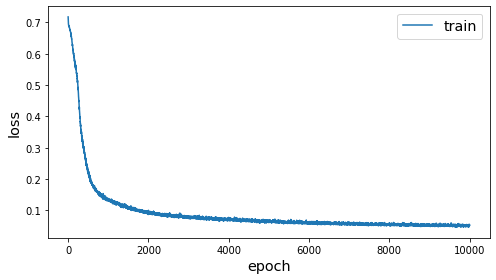

In [27]:
plot_history(history)

In [28]:
x_emb_in, x_emb_out = rgcn.in_out_tensors()
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)

In [29]:
gen = rgcn_generator.flow(G.nodes())
embeddings = emb_model.predict(gen)

In [30]:
pd.DataFrame(embeddings).to_csv("dgi_rgcn_64_30_elu_softmax_10000e.csv")